In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [4]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [5]:
#Data Information
nRowsRead = 1000 # specify 'None' if want to read whole file
# Indias_population.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('populationIndia.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'populationIndia.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 24 rows and 13 columns


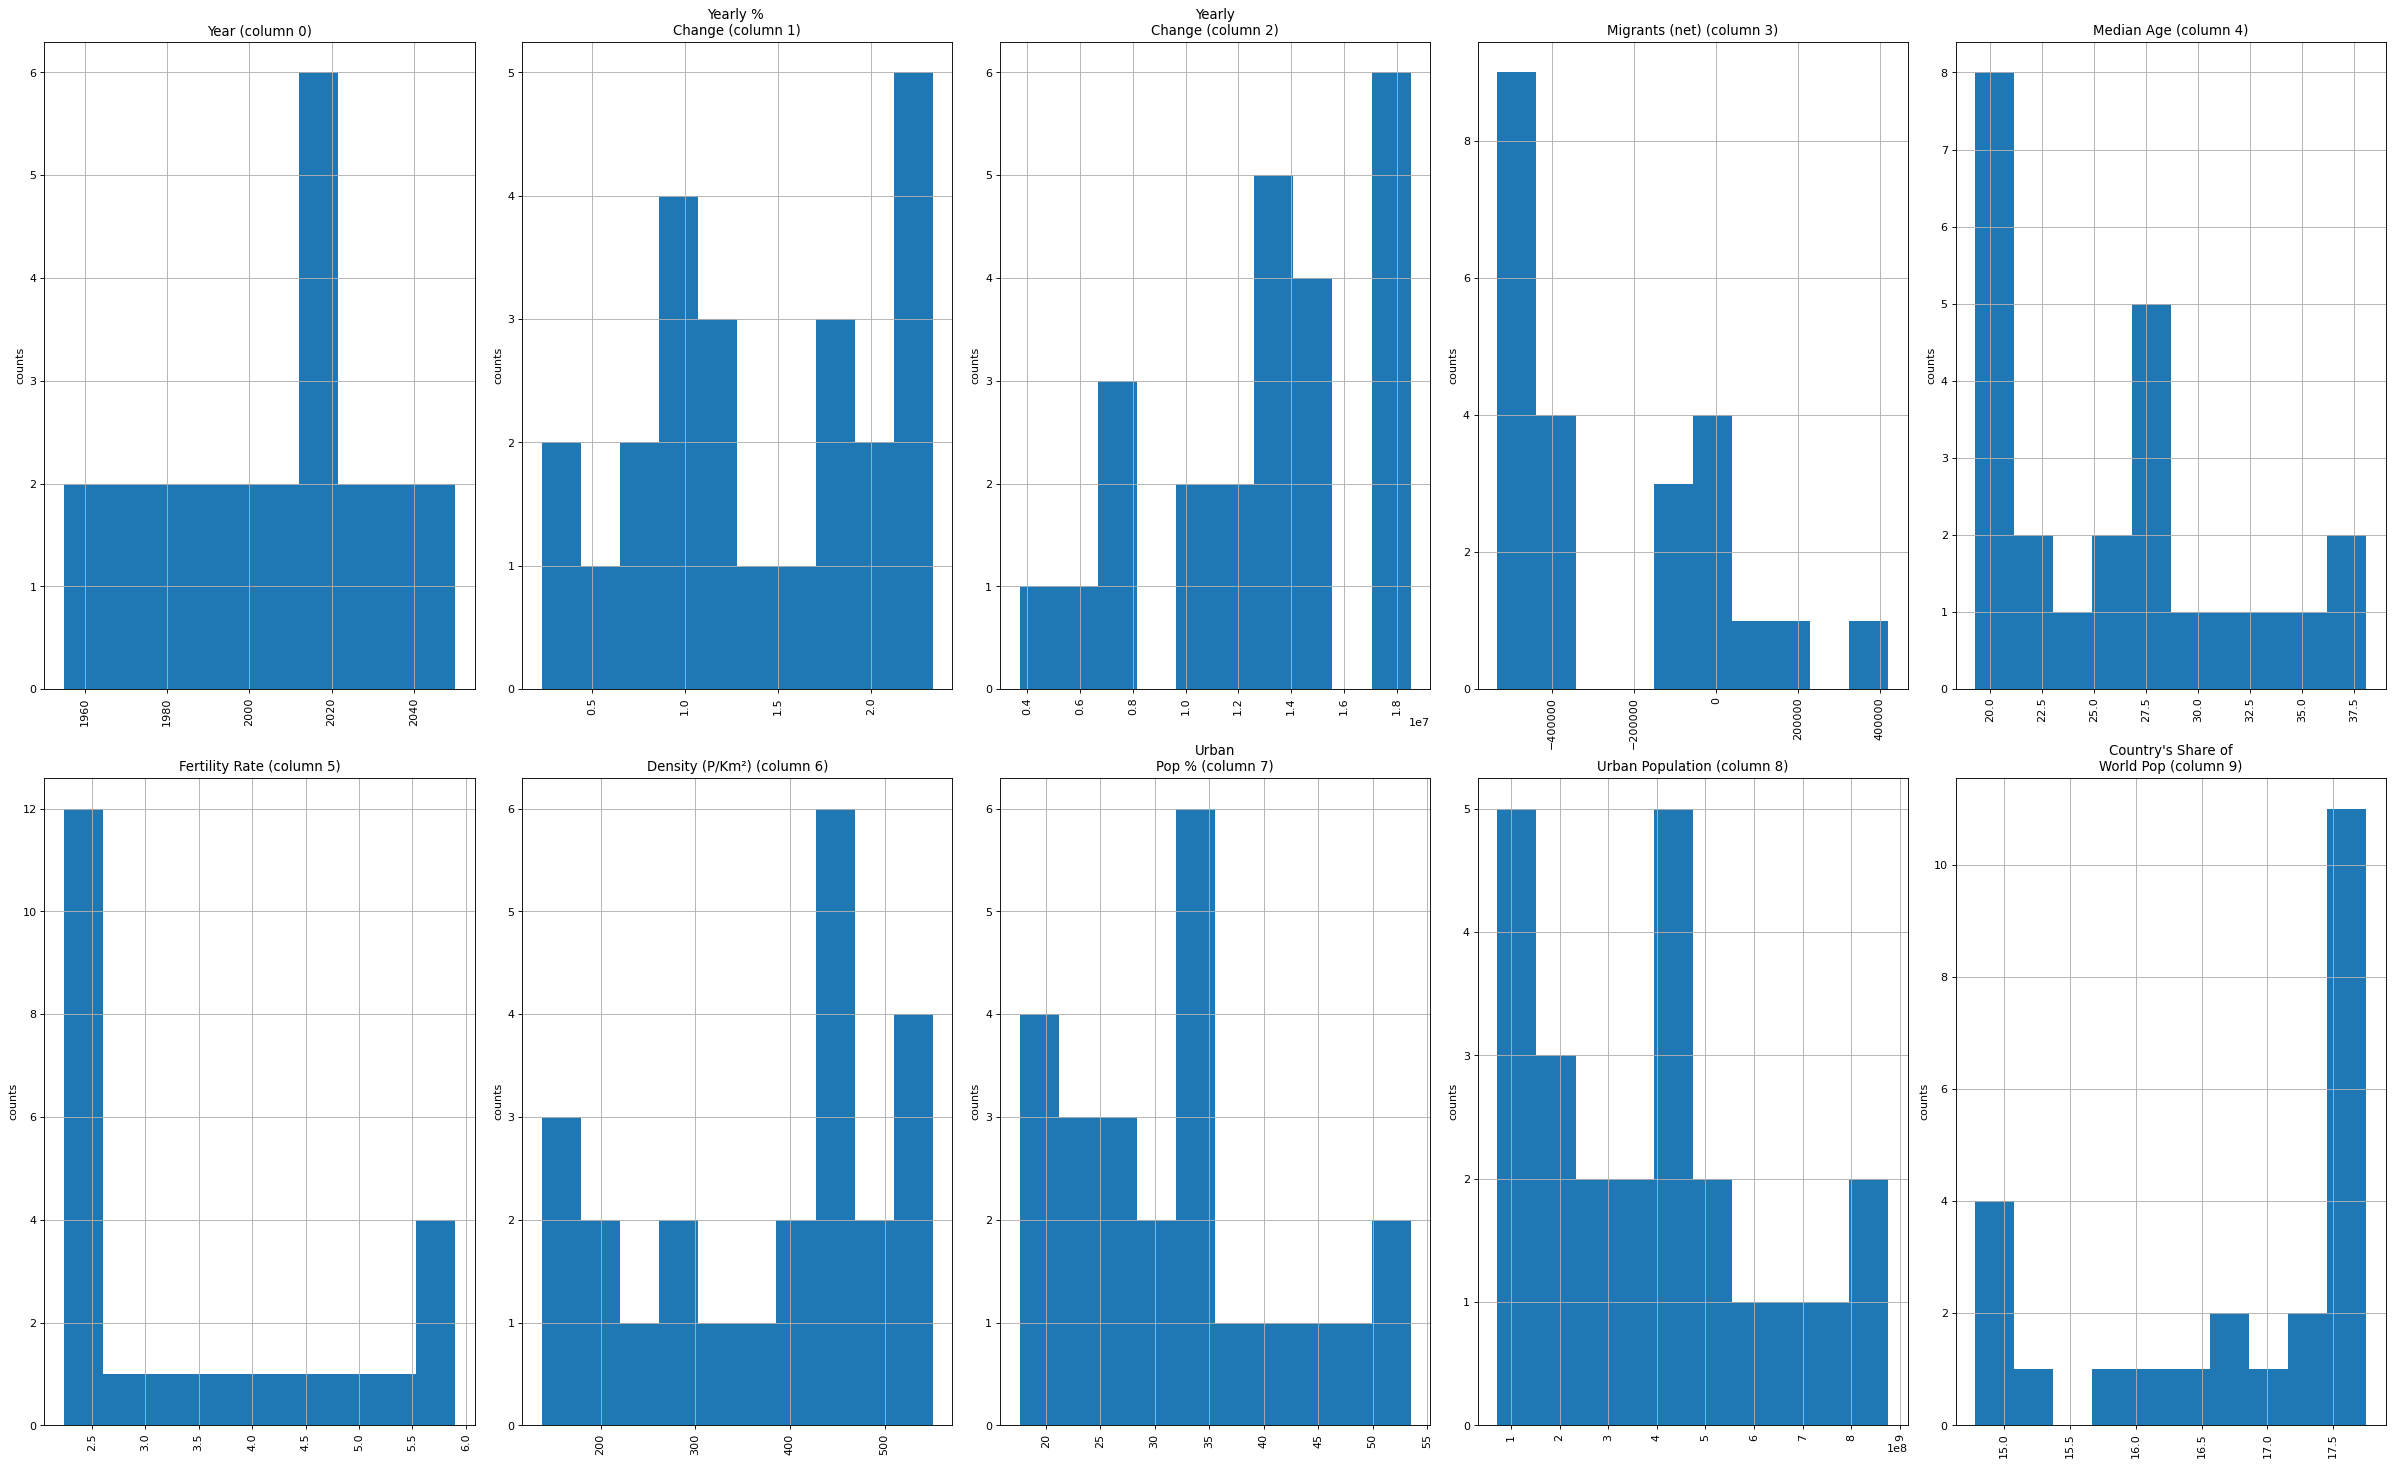

In [6]:
#Distribution graphs
plotPerColumnDistribution(df1,10,5)

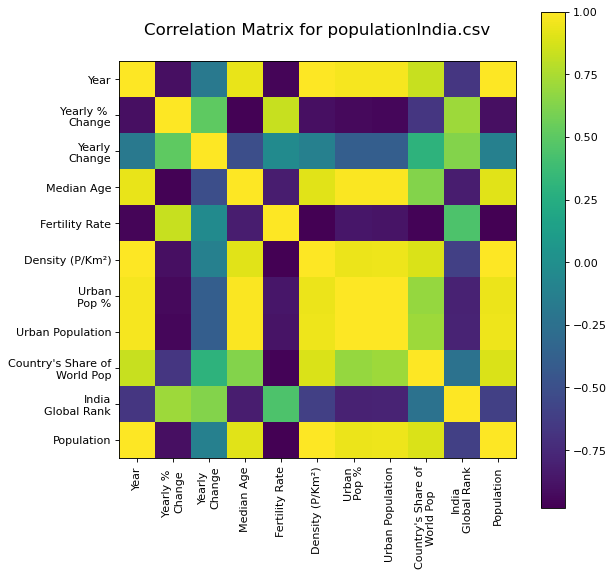

In [7]:
#Correlation between features
plotCorrelationMatrix(df1,8)

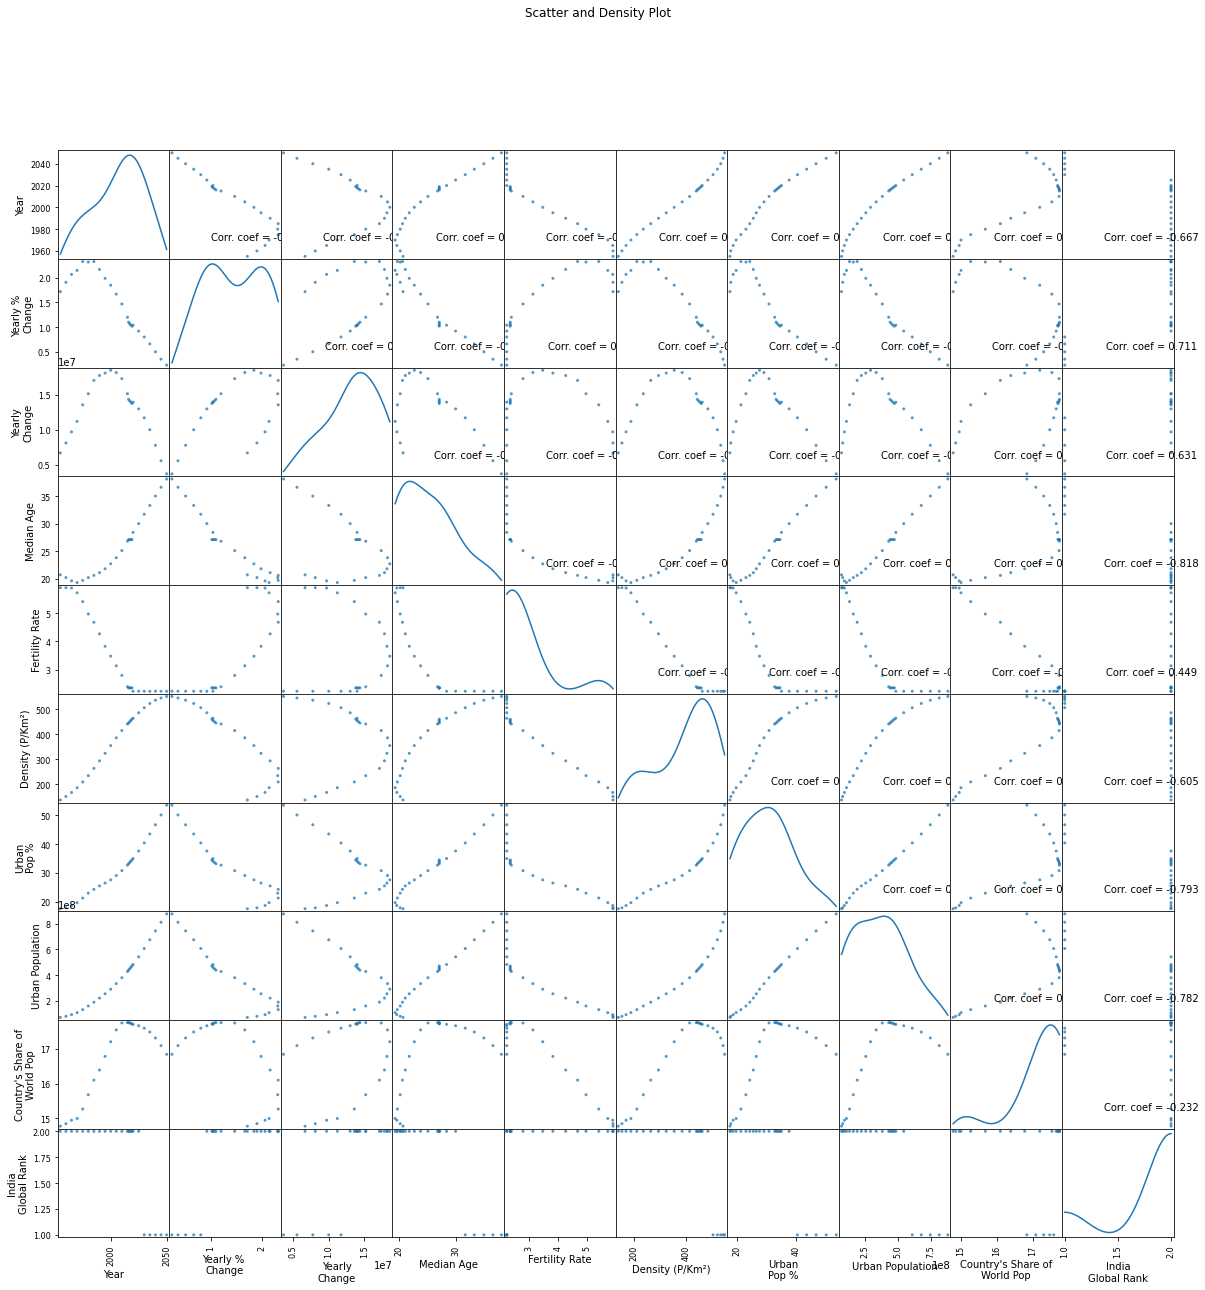

In [8]:
#Scatter matrix for features
plotScatterMatrix(df1, 20, 10)

In [9]:
target = pd.DataFrame(df1, columns=['Population'])

In [10]:
#Features: Fertility rate and yearly change
list_of_columns_to_drop = ["Year", 
                           "Population",
                           "Yearly % \nChange",
                           "India\nGlobal Rank",
                           "Migrants (net)",
                           "Median Age",
                           "Density (P/Km²)",
                           "Urban\nPop %",
                           "Urban Population",
                           "Country's Share of\nWorld Pop",
                           "World Population"]

df1.drop(list_of_columns_to_drop, axis=1, inplace=True)

# check if columns dropped properly
df1.head()

,Yearly\nChange,Fertility Rate
0,3711367,2.24
1,5585537,2.24
2,7793541,2.24
3,10016298,2.24
4,11726140,2.24


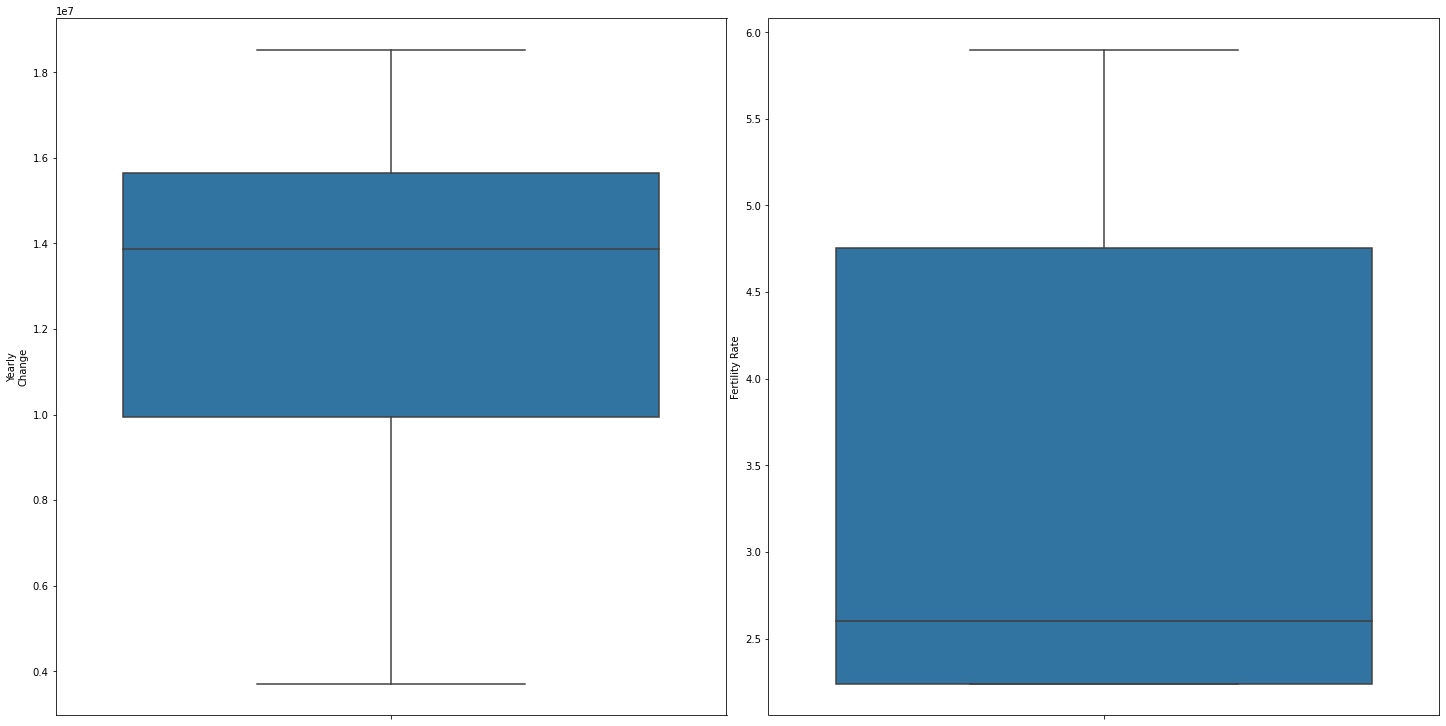

In [11]:
#Checking for outliers
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df1.items():
    sns.boxplot(y=k, data=df1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

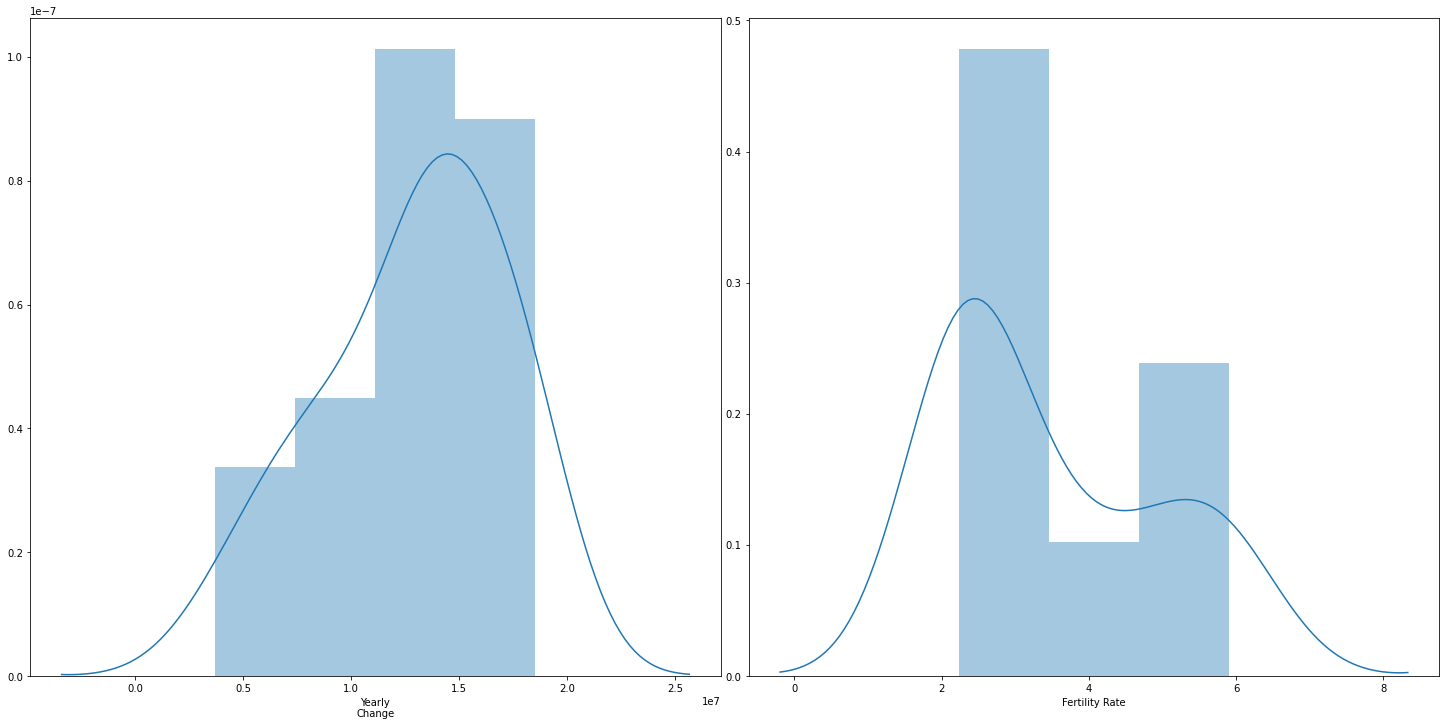

In [12]:
#Distribution
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df1.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#Data Training
Y=target['Population']
X=df1
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg_model = LinearRegression()
trained_model = reg_model.fit(x_train, y_train)

In [17]:
# make predictions
y_predicted = trained_model.predict(x_test)

# rename y_test into y_true for clarity
y_true = y_test

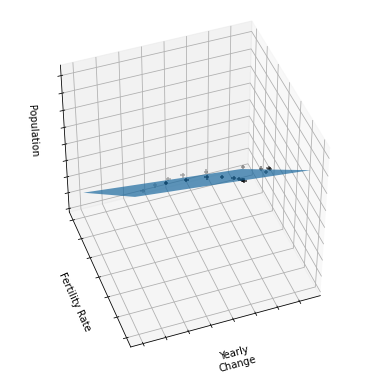

In [18]:
#Plotting the figure
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
plt.clf()

elev = 43.5
azim = -110

ax = Axes3D(fig, elev=elev, azim=azim)

ax.set_xlabel('Yearly\nChange')
ax.set_ylabel('Fertility Rate')
ax.set_zlabel('Population')


#Scatter Plot
ax.scatter(x_train[['Yearly\nChange']], x_train[['Fertility Rate']], y_train, c='k', marker='+')
ax.plot_surface(np.array([[0, 0], [18530592, 18530592]]), np.array([[0, 6], [0, 6]]), trained_model.predict(np.array([[0, 0, 18530592, 18530592], [0, 6, 0, 6]]).T).reshape((2, 2)), alpha=.7)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [19]:
trained_model.coef_

array([-1.33689929e+01, -2.79133708e+08])

In [20]:
#Model Evaluations
from sklearn.metrics import mean_squared_error

# get evaluation metrics
mse = round(mean_squared_error(y_true, y_predicted), 2)
rmse = round(mean_squared_error(y_true, y_predicted, squared=False), 2)
r2 = round(trained_model.score(x_test, y_test), 2)

# evaluate performance
print("Model performance:\nMSE: {}\nRMSE: {}\nR2 score: {}".format(mse, rmse, r2))

Model performance:
MSE: 3069610637129491.0
RMSE: 55404066.97
R2 score: 0.97
